In [1]:
import networkx as nx
import numpy as np
import requests as r
import pandas as pd
from sodapy import Socrata

Data from : https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt

CSV from: https://data.cityofnewyork.us/resource/7ym2-wayt.csv

In [6]:
client = Socrata("data.cityofnewyork.us", None)
# results = client.get_all("7ym2-wayt") to get all of the data (this will take a while)
results = client.get("7ym2-wayt", limit=10000000)
results_df = pd.DataFrame.from_records(results)

In [7]:
results_df.head()

,requestid,boro,yr,m,d,hh,mm,vol,segmentid,wktgeom,street,fromst,tost,direction
0,1100,Staten Island,2011,10,14,10,45,102,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
1,1100,Staten Island,2011,10,14,11,0,110,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
2,1100,Staten Island,2011,10,14,11,15,101,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
3,1100,Staten Island,2011,10,14,11,30,112,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
4,1100,Staten Island,2011,10,14,11,45,94,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB


In [8]:
results_df["date"] = results_df["yr"] + "_" + results_df["m"] + "_" + results_df["d"] + "_" + results_df["hh"] + "_" + results_df["mm"] 

We make a graph of the NYC network with the Nodes as the to and from streets, and the edges between those nodes as the traffic flow. One graph will represent the state of traffic of the city at a single time step (YYYY/MM/DD/HH/mm).

In [12]:
counts = results_df.groupby(["date"], as_index=False).count()

In [16]:
counts

,date,requestid,boro,yr,m,d,hh,mm,vol,segmentid,wktgeom,street,fromst,tost,direction
0,2000_1_10_0_0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2000_1_10_0_15,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2000_1_10_0_30,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2000_1_10_0_45,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2000_1_10_10_0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201120,2016_8_27_7_30,1,1,1,1,1,1,1,1,1,1,1,1,1,1
201121,2016_8_27_7_45,1,1,1,1,1,1,1,1,1,1,1,1,1,1
201122,2016_8_27_8_0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
201123,2016_8_27_8_15,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
counts[counts["boro"]==542]

,date,requestid,boro,yr,m,d,hh,mm,vol,segmentid,wktgeom,street,fromst,tost,direction
150912,2013_10_26_10_0,542,542,542,542,542,542,542,542,542,542,542,542,542,542
150914,2013_10_26_10_30,542,542,542,542,542,542,542,542,542,542,542,542,542,542
150916,2013_10_26_11_0,542,542,542,542,542,542,542,542,542,542,542,542,542,542
150918,2013_10_26_11_30,542,542,542,542,542,542,542,542,542,542,542,542,542,542
150920,2013_10_26_12_0,542,542,542,542,542,542,542,542,542,542,542,542,542,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151090,2013_10_27_7_30,542,542,542,542,542,542,542,542,542,542,542,542,542,542
151092,2013_10_27_8_0,542,542,542,542,542,542,542,542,542,542,542,542,542,542
151094,2013_10_27_8_30,542,542,542,542,542,542,542,542,542,542,542,542,542,542
151096,2013_10_27_9_0,542,542,542,542,542,542,542,542,542,542,542,542,542,542


In [49]:
def make_graph_for_time(date):
       G = nx.DiGraph()
       for row in results_df[results_df["date"]==date].iterrows():
              r = row[1]
              to_street = r["tost"]
              from_street = r["fromst"]
              weight = r["vol"]
              G.add_weighted_edges_from([(to_street, from_street, weight)])
       return G


In [50]:
date = "2013_10_27_9_30"
G = make_graph_for_time(date)

In [51]:
print(len(G.nodes), len(G.edges))


419 287


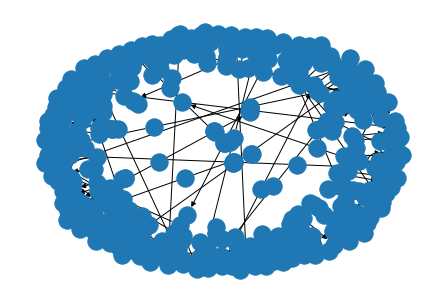

In [48]:
nx.draw_spring(G)